In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
#word-level one-hot encoding
import numpy as np
samples = ["The cat sat on the mat.", "The dog ate my homework."]
token_index = {}

for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_length = 10
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
k = []

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        k.append(index)
        results[i, j, index] = 1.
print(k)

[1, 2, 3, 4, 5, 6, 1, 7, 8, 9, 10]


In [3]:
#character-level one-hot encoding
import string
import numpy as np
samples = ["The cat sat on the mat.", "The dog ate my homework."]
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
k = []

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        for character in word:
            index = token_index.get(character)
            k.append(index)
            results[i, j, index] = 1.
print(k)

[56, 18, 15, 13, 11, 30, 29, 11, 30, 25, 24, 30, 18, 15, 23, 11, 30, 76, 56, 18, 15, 14, 25, 17, 11, 30, 15, 23, 35, 18, 25, 23, 15, 33, 25, 28, 21, 76]


In [4]:
#one-hot encoding with Tokenizer
from keras.preprocessing.text import Tokenizer
samples = ["The cat sat on the mat.", "The dog ate my homework."]
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


Using TensorFlow backend.


In [5]:
from keras.preprocessing.sequence import pad_sequences
pad_sequences(sequences, 3)

array([[4, 1, 5],
       [7, 8, 9]], dtype=int32)

In [6]:
#one-hot encoding with hashing
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)
train_data = sequence.pad_sequences(train_data, 500)
test_data = sequence.pad_sequences(test_data, 500)
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_label,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/home/ashutosh/anaconda3/envs/PythonGPU/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 38s 2ms/step - loss: 0.6404 - acc: 0.6174 - val_loss: 0.5329 - val_acc: 0.7624
Epoch 2/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.3996 - acc: 0.8296 - val_loss: 0.4810 - val_acc: 0.7776
Epoch 3/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.2938 - acc: 0.8830 - val_loss: 0.3815 - val_acc: 0.8482
Epoch 4/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.2406 - acc: 0.9063 - val_loss: 0.3934 - val_acc: 0.8320
Epoch 5/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1820 - acc: 0.9327 - val_loss: 0.3812 - val_acc: 0.8424
Epoch 6/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1562 - acc: 0.9455 - val_loss: 0.4032 - val_acc: 0.8520
Epoch 7/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.0892 - acc: 0.9710 - val_loss: 0.4166 - val_acc:

In [10]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)
train_data = sequence.pad_sequences(train_data, 500)
test_data = sequence.pad_sequences(test_data, 500)
model = Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_label,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

/home/ashutosh/anaconda3/envs/PythonGPU/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.5060 - acc: 0.7603 - val_loss: 0.4033 - val_acc: 0.8322
Epoch 2/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.3079 - acc: 0.8801 - val_loss: 0.2945 - val_acc: 0.8796
Epoch 3/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.2328 - acc: 0.9121 - val_loss: 0.3603 - val_acc: 0.8446
Epoch 4/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.2022 - acc: 0.9254 - val_loss: 0.3014 - val_acc: 0.8740
Epoch 5/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.1789 - acc: 0.9351 - val_loss: 0.2840 - val_acc: 0.8814
Epoch 6/10
20000/20000 [==============================] - 76s 4ms/step - loss: 0.1551 - acc: 0.9460 - val_loss: 0.3027 - val_acc: 0.8860
Epoch 7/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.1417 - acc: 0.9495 - val_loss: 0.3668 - val_acc:

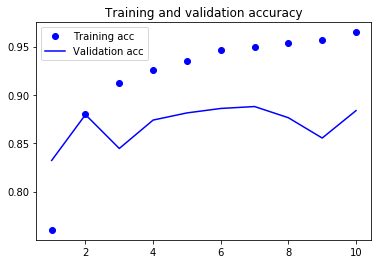

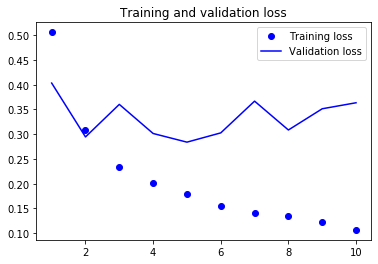

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [2]:
import os
data_dir = '/home/ashutosh/Downloads'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [3]:
import numpy as np
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    float_data[i] = [float(x) for x in line.split(',')[1:]]

In [4]:
len(float_data)

420551

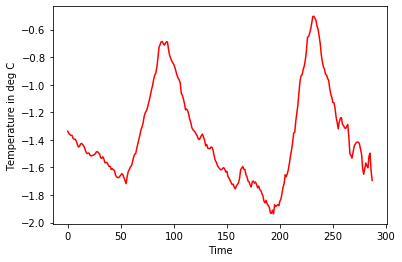

In [48]:
import matplotlib.pyplot as plt

plt.plot(range(288), float_data[-288:, 1], color='red')
plt.xlabel('Time')
plt.ylabel('Temperature in deg C')
plt.show()

In [4]:
mean = np.mean(float_data, axis=0)[1]
std = np.std(float_data, axis=0)[1]
float_data = (float_data - np.mean(float_data, axis=0, keepdims=True)) / np.std(float_data, axis=0)

In [5]:
print(mean)
std

9.450147354304178


8.42335519570272

In [14]:
def generator(data, lookback, delay, min_index, max_index,
            shuffle=False, batch_size=256, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [15]:
lookback = 1440
step = 6
delay = 144
batch_size = 256

train_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=0,
                    max_index=200000,
                    shuffle=True,
                    step=step,
                    batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    shuffle=True,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=300001,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)
val_steps = (300000 - 200001 - lookback) // 256
test_steps = (len(float_data) - 300001 - lookback) // 256

In [19]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                            steps_per_epoch=500,
                            epochs=20,
                            validation_data=val_gen,
                            validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 15s 29ms/step - loss: 4.2627 - accuracy: 0.0000e+00 - val_loss: 0.2213 - val_accuracy: 0.0000e+00
Epoch 2/20
500/500 [==============================] - 15s 29ms/step - loss: 0.8226 - accuracy: 0.0000e+00 - val_loss: 0.1648 - val_accuracy: 0.0000e+00
Epoch 3/20
121/500 [======>.......................] - ETA: 7s - loss: 0.3015 - accuracy: 0.0000e+00

KeyboardInterrupt: 

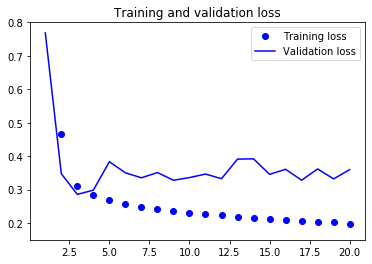

In [10]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim(0.15, 0.8)
plt.legend()
plt.show()

In [13]:
float_data.shape

(420551, 14)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                107552    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________


In [11]:
tar = []
for i in range(144):
    tar.append(model.predict(np.expand_dims(float_data[-240-delay+i:-delay+i], axis=0)).reshape(()))

In [12]:
tar = tar * np.array(std) + np.array(mean)

[array(-1.3385576, dtype=float32),
 array(-1.3692384, dtype=float32),
 array(-1.3743973, dtype=float32),
 array(-1.3487097, dtype=float32),
 array(-1.3081585, dtype=float32),
 array(-1.245701, dtype=float32),
 array(-1.1795021, dtype=float32),
 array(-1.1265008, dtype=float32),
 array(-1.0780871, dtype=float32),
 array(-1.0427704, dtype=float32),
 array(-1.0136709, dtype=float32),
 array(-0.98866946, dtype=float32),
 array(-0.95223004, dtype=float32),
 array(-0.95957434, dtype=float32),
 array(-0.9409182, dtype=float32),
 array(-0.9529302, dtype=float32),
 array(-0.96725017, dtype=float32),
 array(-0.958059, dtype=float32),
 array(-0.91178626, dtype=float32),
 array(-0.88971806, dtype=float32),
 array(-0.88006604, dtype=float32),
 array(-0.87881327, dtype=float32),
 array(-0.8895496, dtype=float32),
 array(-0.887479, dtype=float32),
 array(-0.88096434, dtype=float32),
 array(-0.8839459, dtype=float32),
 array(-0.8796547, dtype=float32),
 array(-0.8643851, dtype=float32),
 array(-0.8339

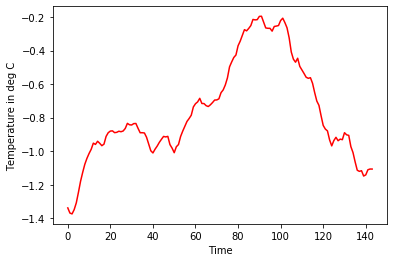

In [13]:
plt.plot(range(144), tar, color='red')
plt.xlabel('Time')
plt.ylabel('Temperature in deg C')
plt.show()

In [10]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                            steps_per_epoch=500,
                            epochs=20,
                            validation_data=val_gen,
                            validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 110s 219ms/step - loss: 0.3263 - val_loss: 0.2652
Epoch 2/20
500/500 [==============================] - 108s 216ms/step - loss: 0.3002 - val_loss: 0.2912
Epoch 3/20
500/500 [==============================] - 109s 217ms/step - loss: 0.2956 - val_loss: 0.2871
Epoch 4/20
500/500 [==============================] - 109s 218ms/step - loss: 0.2896 - val_loss: 0.2822
Epoch 5/20
500/500 [==============================] - 109s 218ms/step - loss: 0.2827 - val_loss: 0.3034
Epoch 6/20
500/500 [==============================] - 108s 217ms/step - loss: 0.2791 - val_loss: 0.2663
Epoch 7/20
500/500 [==============================] - 109s 217ms/step - loss: 0.2752 - val_loss: 0.2530
Epoch 8/20
500/500 [==============================] - 109s 217ms/step - loss: 0.2705 - val_loss: 0.2750
Epoch 9/20
500/500 [==============================] - 108s 217ms/step - loss: 0.2659 - val_loss: 0.2707
Epoch 10/20
500/500 [==============================] - 109s 217m

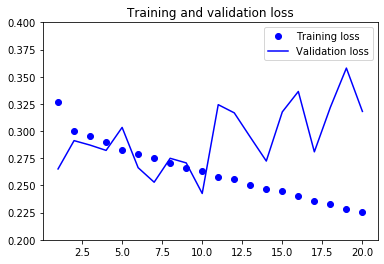

In [12]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim(0.2, 0.4,0.02)
plt.legend()
plt.show()

In [14]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.005))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                            steps_per_epoch=500,
                            epochs=20,
                            validation_data=val_gen,
                            validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 62s 123ms/step - loss: 0.3503 - val_loss: 0.3394
Epoch 2/20
500/500 [==============================] - 53s 107ms/step - loss: 0.3177 - val_loss: 0.3145
Epoch 3/20
500/500 [==============================] - 55s 109ms/step - loss: 0.3006 - val_loss: 0.2893
Epoch 4/20
500/500 [==============================] - 53s 105ms/step - loss: 0.2896 - val_loss: 0.3135
Epoch 5/20
500/500 [==============================] - 50s 100ms/step - loss: 0.2772 - val_loss: 0.3044
Epoch 6/20
500/500 [==============================] - 48s 97ms/step - loss: 0.2688 - val_loss: 0.3218
Epoch 7/20
500/500 [==============================] - 49s 97ms/step - loss: 0.2580 - val_loss: 0.3279
Epoch 8/20
500/500 [==============================] - 48s 96ms/step - loss: 0.2483 - val_loss: 0.3466
Epoch 9/20
500/500 [==============================] - 49s 97ms/step - loss: 0.2406 - val_loss: 0.3063
Epoch 10/20
500/500 [==============================] - 49s 97ms/step - loss: 

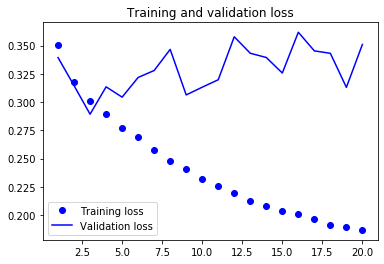

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [49]:
tar = []
for i in range(delay):
    tar.append(model.predict(np.expand_dims(float_data[-240-2*delay+i:-2*delay+i], axis=0))[0].reshape(()))

In [50]:
tar = tar * np.array(std) + np.array(mean)

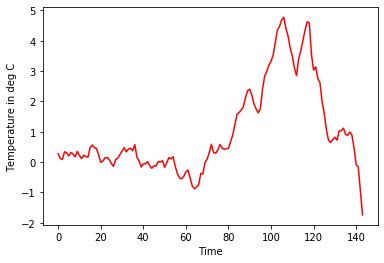

In [51]:
plt.plot(range(delay), tar, color='red')
plt.xlabel('Time')
plt.ylabel('Temperature in deg C')
plt.show()

In [58]:
history = model.evaluate_generator(test_gen, steps=test_steps)

In [59]:
history

0.29392555356025696